In [2]:
# Dalvin Colbert 
# RFN1 - Task 2 - Clustering Techniques
# D603 - Machine Learning

In [3]:
# Import appropriate modules

import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import random
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.datasets import make_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from scipy import stats
from scipy.stats import randint
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import Data set
df = pd.DataFrame(pd.read_csv("C:\\Users\\dalvi\\OneDrive - Western Governors University\\MSDADS\\D603 - Machine Learning\\Writeup\\Task 2\\churn_clean.csv", na_values=['NA', 'N/A'], keep_default_na=False))
num_rows, num_columns = df.shape

# Describe the general characteristcs of the inital dataset (e.g., rows, columns)
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 10000 rows and 50 columns.


In [5]:
# Copy the dataset for integrity
df_copy = df.copy()

In [6]:
# Examine first five rows of dataframe
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [7]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [8]:
# Identify variables by type
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"The categorical variables are {categorical_columns}")
print(f"The numerical variables are {numerical_columns}")

# Identify and drop known unwanted variables 
drop_list = ['TimeZone','CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Job', 'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8', 'Age', 'Children', 'Email', 'Contacts', 'Yearly_equip_failure' ]
drop_list.extend(categorical_columns)
drop_list

The categorical variables are ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
The numerical variables are ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


['TimeZone',
 'CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Area',
 'Job',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8',
 'Age',
 'Children',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Area',
 'TimeZone',
 'Job',
 'Marital',
 'Gender',
 'Churn',
 'Techie',
 'Contract',
 'Port_modem',
 'Tablet',
 'InternetService',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [9]:
# Identify initial dataset
# Filter data frame on Churn == Yes
#df = df[df['Churn'] == 'Yes']
df = df.drop(drop_list, axis=1)
num_rows, num_columns = df.shape

#filnum_rows, filnum_columns = df.shape

# Describe the general characteristcs of the inital dataset (e.g., rows, columns)
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")
df.head()

The dataset contains 10000 rows and 5 columns.


,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,28561.99,7.978323,6.795513,172.455519,904.536110
1,21704.77,11.699080,1.156681,242.632554,800.982766
2,9609.57,10.752800,15.754144,159.947583,2054.706961
3,18925.23,14.913540,17.087227,119.956840,2164.579412
4,40074.19,8.147417,1.670972,149.948316,271.493436


In [10]:
df.columns

Index(['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')

###### Cleaning 

In [11]:
# Identify duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")
print("\n\n")

Number of duplicate entries: 0





In [12]:
# Missing values
total_missing_values = df.isna().sum().sum()
print('Total missing values: ', total_missing_values)
print(df.isna().sum())

# Drop missing values
#df.dropna(inplace=True)

#new_total_missing_values = df.isna().sum().sum()
#print('Total missing values: ', new_total_missing_values)
#print(df.isna().sum())

Total missing values:  0
Income                0
Outage_sec_perweek    0
Tenure                0
MonthlyCharge         0
Bandwidth_GB_Year     0
dtype: int64


In [13]:
#df_encoded.to_csv("df_encoded_cleaned.csv")

In [14]:
# Select features
X = df
#Y = df_encoded['Churn_encoded']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled
df_scaled.to_csv("df_scaled_cleaned.csv")


In [15]:
# Apply PCA
pca = PCA()  # Adjust the number of components as needed
x_pca = pca.fit_transform(df_scaled)




In [16]:
### Principal Component Analysis
#from sklearn.composition import PCA

## Consider 2 components 
pca = PCA(n_components=2)

# pca.fit(scaled_data)
x_pca = pca.fit_transform(X_scaled)
#x2_pca = pca.fit_transform()
## create dataframe
pca2_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
pca2_df



,PC1,PC2
0,-1.551056,-0.279016
1,-1.662133,1.703695
2,-0.948752,0.406056
3,-0.906067,0.650333
4,-1.912132,-0.712517
...,...,...
9995,1.897218,-0.577749
9996,1.479124,-0.202701
9997,0.583942,-0.921346
9998,2.048431,1.895463


[[ 5.55650979e-03 -3.70087250e-01]
 [ 8.27081484e-03  6.91153822e-01]
 [ 9.96561988e-01 -4.04542313e-02]
 [ 5.75303600e-02  6.38698948e-01]
 [ 9.98419274e-01 -8.95847432e-05]]


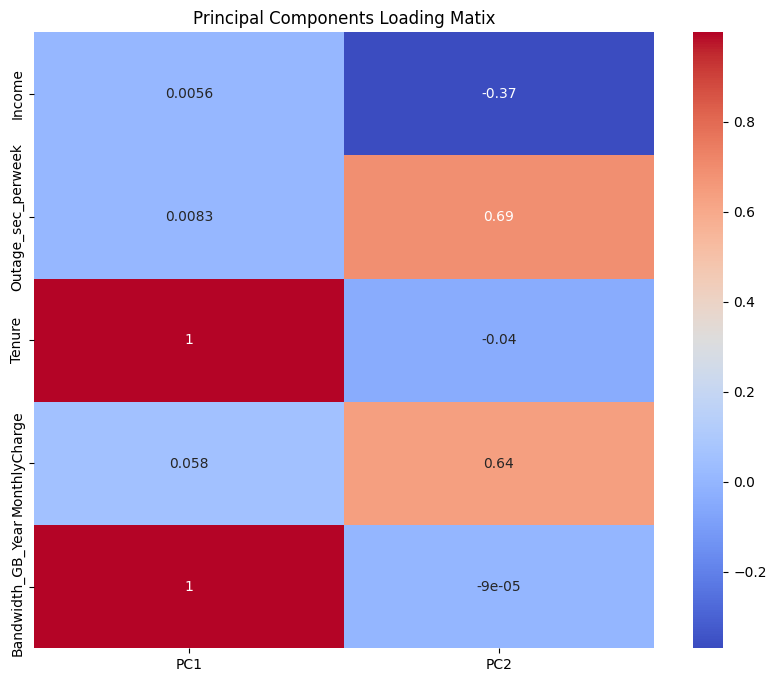

The eigenvalue of PC1 is: 1.9933858660512098
The eigenvalue of PC2 is: 1.0242310775426742
Explained variability per component: [0.39863731 0.20482573]


In [17]:
# Extract loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(loadings)

# Plot heatmap of loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', yticklabels=df.columns, xticklabels=['PC1', 'PC2'])
plt.title('Principal Components Loading Matix')
plt.show()
# PCA variance analysis
print(f"The eigenvalue of PC1 is: {pca.explained_variance_[0]}")
print(f"The eigenvalue of PC2 is: {pca.explained_variance_[1]}")
print(f"Explained variability per component: {pca.explained_variance_ratio_}")

Text(0, 0.5, 'PC2')

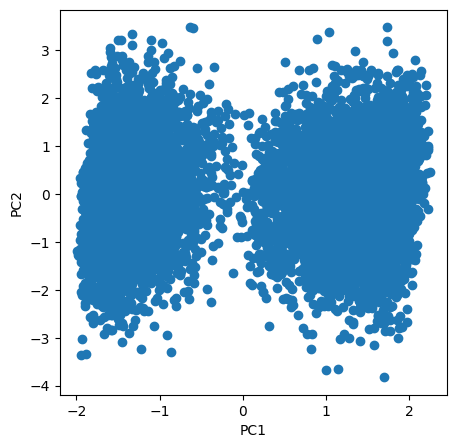

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
#df_scaled['Churn_encoded']

In [19]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.50
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
feature_loadings = pca.components_[:n_components].T
feature_importance = np.sum(np.abs(feature_loadings), axis=1)
selected_features = np.argsort(feature_importance)[::-1][:n_components]

print(x_pca[selected_features])
print(type(x_pca))
x_pca[10]
selected_features

[[-0.94875151  0.40605648]
 [-1.91213244 -0.71251687]]
<class 'numpy.ndarray'>


array([2, 4], dtype=int64)

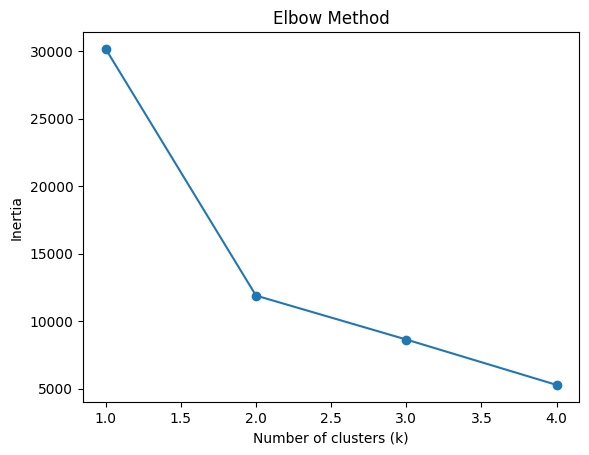

In [20]:
# Determine optimum number of clusters
inertias = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 5), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [21]:
# Run K-means with the optimal number of clusters
optimal_k = 2  # Replace with the optimal k determined from the elbow method
kmeans_pca = KMeans(n_clusters=optimal_k,  random_state=42)
cluster_labels = kmeans_pca.fit_predict(x_pca)

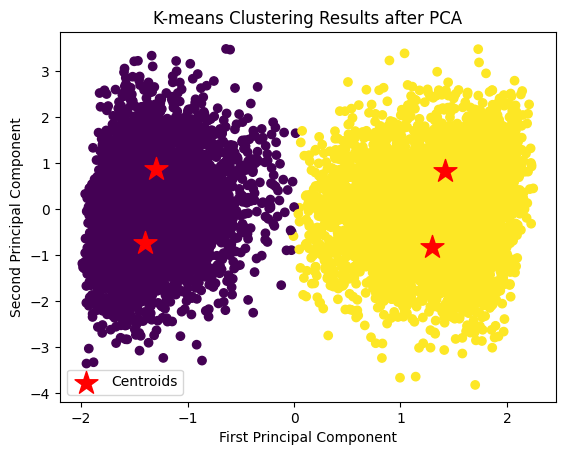

In [22]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
plt.title('K-means Clustering Results after PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

In [23]:
pca_list = ['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'] #'StreamingTV_encoded', 'TechSupport_encoded']
X2_comp= df[pca_list]
X2_comp_scaled = scaler.fit_transform(X2_comp)

### Principal Component Analysis
#from sklearn.composition import PCA

## Consider 2 components 
pca = PCA(n_components=2)

# pca.fit(scaled_data)
x2_pca = pca.fit_transform(X2_comp_scaled)

## create dataframe
pca2_df = pd.DataFrame(data=x2_pca, columns=['PC1', 'PC2'])
pca2_df

,PC1,PC2
0,-1.545548,0.056043
1,-1.663171,1.700088
2,-0.946012,-0.253546
3,-0.912717,-1.186012
4,-1.908518,-0.456308
...,...,...
9995,1.896236,-0.366614
9996,1.486293,0.752758
9997,0.589819,-0.090090
9998,2.047446,1.780139


[[ 0.99658586 -0.06082549]
 [ 0.05737992  0.99839585]
 [ 0.99842882  0.00333518]]


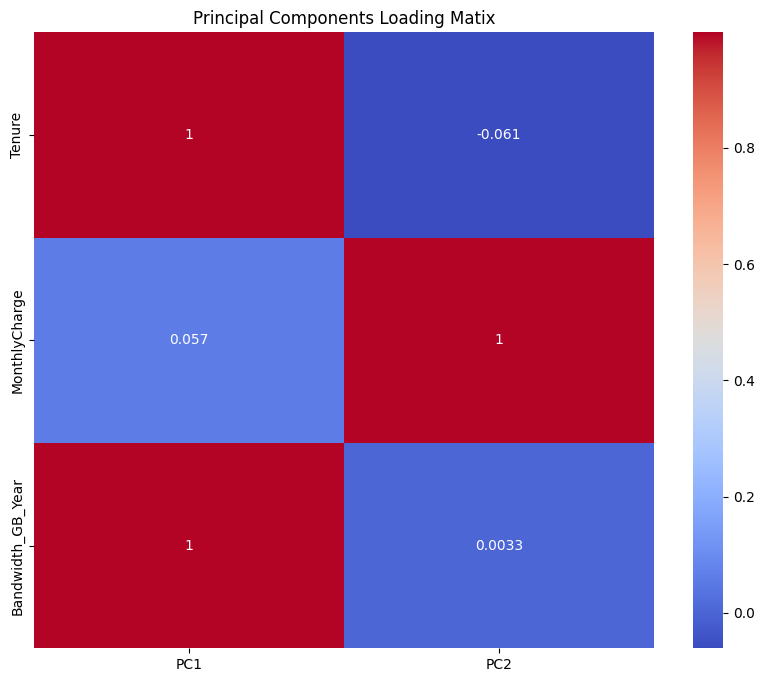

The eigenvalue of PC1 is: 1.9933359424937334
The eigenvalue of PC2 is: 1.0005051299807426
Explained variability per component: [0.66437887 0.33346836]


In [24]:
# Extract loadings
loadings2 = pca.components_.T * np.sqrt(pca.explained_variance_)
print(loadings2)

# Plot heatmap of loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings2, annot=True, cmap='coolwarm', yticklabels=X2_comp.columns, xticklabels=['PC1', 'PC2'])
plt.title('Principal Components Loading Matix')
plt.show()
# PCA variance analysis
print(f"The eigenvalue of PC1 is: {pca.explained_variance_[0]}")
print(f"The eigenvalue of PC2 is: {pca.explained_variance_[1]}")
print(f"Explained variability per component: {pca.explained_variance_ratio_}")

Text(0, 0.5, 'PC2')

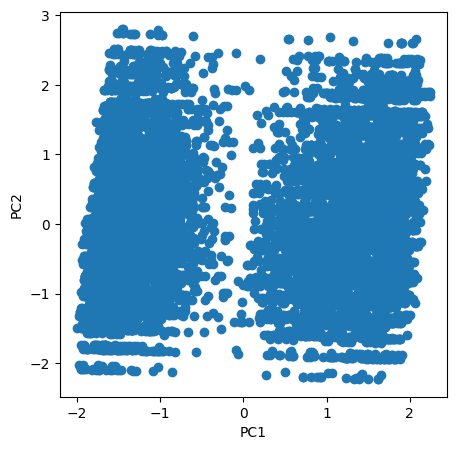

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(x2_pca[:,0], x2_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

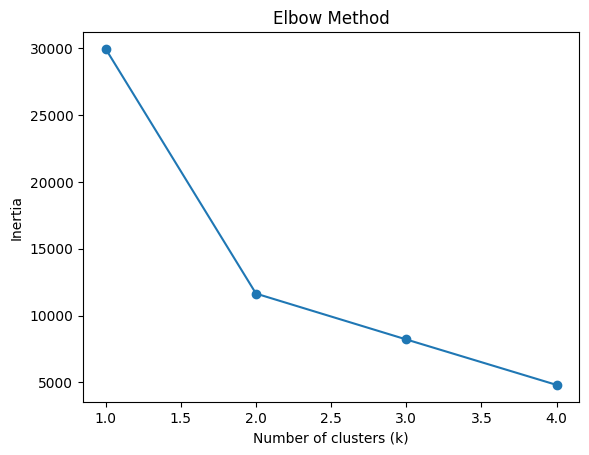

In [26]:
inertias = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x2_pca)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 5), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [27]:
# Run K-means with the optimal number of clusters
optimal_k = 2  # Replace with the optimal k determined from the elbow method
kmeans_pca = KMeans(n_clusters=optimal_k,  random_state=42)
cluster_labels = kmeans_pca.fit_predict(x2_pca)


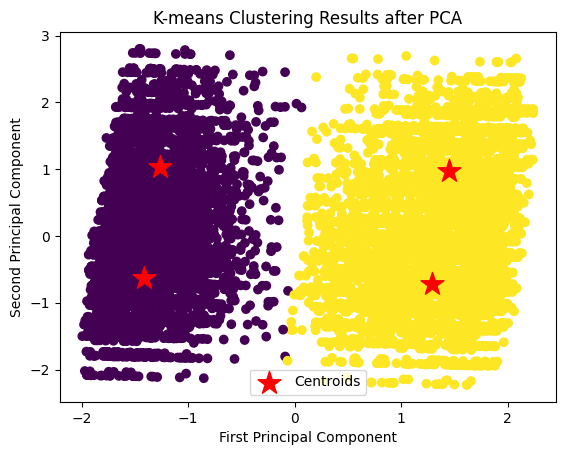

In [28]:
plt.scatter(x2_pca[:, 0], x2_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
plt.title('K-means Clustering Results after PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [29]:
from collections import Counter
print(Counter(kmeans.labels_))


Counter({1: 3027, 2: 2938, 0: 2061, 3: 1974})


In [30]:
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"The average silhouette score is: {silhouette_avg}")


The average silhouette score is: -0.0014644649400120092


In [31]:
print(f"Inertia: {kmeans.inertia_}")


Inertia: 4818.609270867912


In [32]:
feature_importance = np.abs(kmeans.cluster_centers_).mean(axis=0)
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")


Income: 1.3537075044398468
Outage_sec_perweek: 0.8386970461862423


In [33]:
cluster_profiles = X.copy()
cluster_profiles['Cluster'] = kmeans.labels_
cluster_profiles.groupby('Cluster').mean()


,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
Cluster,,,,,
0,39787.952644,9.974254,9.203388,214.864874,1447.809246
1,40144.099845,9.889768,59.778986,143.803861,5366.867381
2,39736.146903,10.004790,9.066997,143.217730,1215.903603
3,39415.049382,10.198147,60.133674,216.486160,5634.067018


In [34]:
tenure_list = ['Tenure', 'Bandwidth_GB_Year']
tenure_df = df[tenure_list]
tenure_df

,Tenure,Bandwidth_GB_Year
0,6.795513,904.536110
1,1.156681,800.982766
2,15.754144,2054.706961
3,17.087227,2164.579412
4,1.670972,271.493436
...,...,...
9995,68.197130,6511.252601
9996,61.040370,5695.951810
9997,47.416890,4159.305799
9998,71.095600,6468.456752


In [35]:
# Scale tenure dataframe 
tenure_scaled = scaler.fit_transform(tenure_df)
type(tenure_scaled)


numpy.ndarray

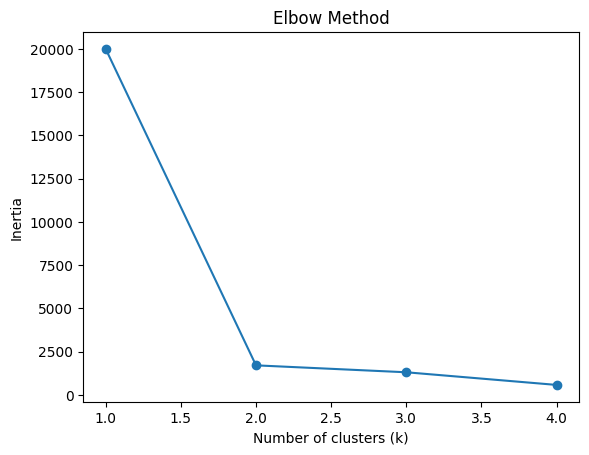

In [36]:
inertias = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tenure_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 5), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [37]:
# Run K-means with the optimal number of clusters
optimal_k = 2  # Replace with the optimal k determined from the elbow method
kmeans_tenure = KMeans(n_clusters=optimal_k,  random_state=42)
cluster_labels = kmeans_tenure.fit_predict(tenure_scaled)

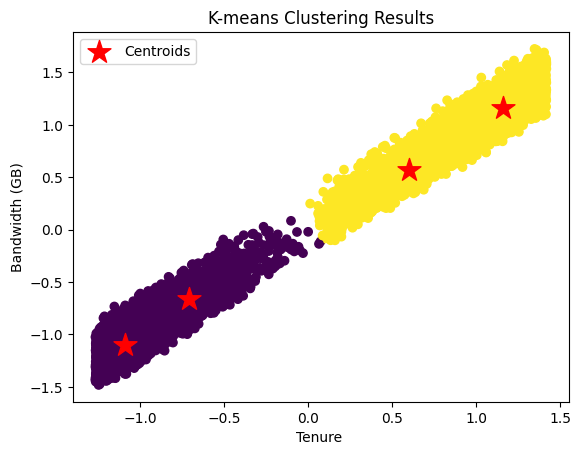

In [38]:
plt.scatter(tenure_scaled[:, 0], tenure_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
plt.title('K-means Clustering Results')
plt.xlabel('Tenure ')
plt.ylabel('Bandwidth (GB)')
plt.legend()
plt.show()

In [45]:

frame = pd.DataFrame(kmeans.cluster_centers_, columns=['Cluster 1',  'Cluster 2'])
frame

,Cluster 1,Cluster 2
0,-0.712230,-0.665088
1,1.157277,1.160729
2,-1.090637,-1.102256
3,0.599427,0.569250
